In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [2]:
# Preprocess the data
def preprocess_data(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Remove outliers
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    
    return df_cleaned, numeric_cols

# Preprocess the data
df_cleaned, numeric_cols = preprocess_data(info_A1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


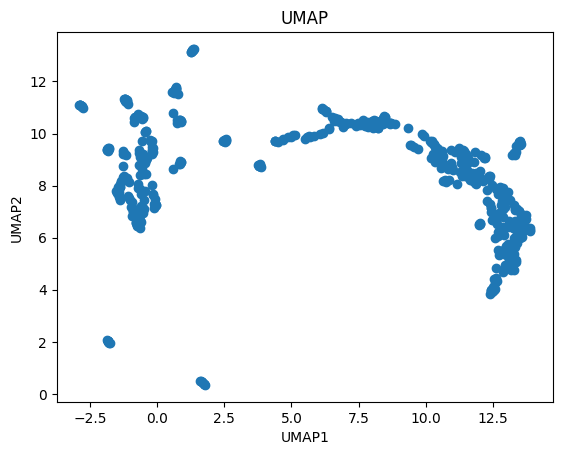

In [3]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_reducer.fit_transform(scaled_data)

# Convert to DataFrame for convenience
umap_df = pd.DataFrame(data=umap_data, columns=['UMAP1', 'UMAP2'])

# plot UMAP
import matplotlib.pyplot as plt
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'])
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP')
plt.show()




Clustering with 2 Clusters

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

models_2_clusters = {
    'KMeans_2': KMeans(n_clusters=2, random_state=42),
    'AgglomerativeClustering_2': AgglomerativeClustering(n_clusters=2),
    'DBSCAN_2': DBSCAN(eps=0.5, min_samples=5),
    'SpectralClustering_2': SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=42),
    'GaussianMixture_2': GaussianMixture(n_components=2, random_state=42)
}

cluster_labels_2 = {}
for model_name, model in models_2_clusters.items():
    cluster_labels_2[model_name] = model.fit_predict(umap_df)


In [5]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_score, ch_score = -1, float('inf'), 0
    return silhouette, db_score, ch_score

evaluation_results_2 = {}
for model_name, labels in cluster_labels_2.items():
    silhouette, db_score, ch_score = evaluate_clustering(labels, umap_df)
    evaluation_results_2[model_name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_score,
        'Calinski-Harabasz Index': ch_score
    }

# Print evaluation results for 2 clusters
for model_name, results in evaluation_results_2.items():
    print(f"{model_name} Evaluation Results for 2 Clusters:")
    print(f"Silhouette Score: {results['Silhouette Score']}")
    print(f"Davies-Bouldin Index: {results['Davies-Bouldin Index']}")
    print(f"Calinski-Harabasz Index: {results['Calinski-Harabasz Index']}\n")


KMeans_2 Evaluation Results for 2 Clusters:
Silhouette Score: 0.6590040326118469
Davies-Bouldin Index: 0.47903379853169376
Calinski-Harabasz Index: 1492.06201171875

AgglomerativeClustering_2 Evaluation Results for 2 Clusters:
Silhouette Score: 0.614004909992218
Davies-Bouldin Index: 0.5146395564532044
Calinski-Harabasz Index: 1179.912109375

DBSCAN_2 Evaluation Results for 2 Clusters:
Silhouette Score: 0.2794274687767029
Davies-Bouldin Index: 0.49379403942729166
Calinski-Harabasz Index: 566.8767700195312

SpectralClustering_2 Evaluation Results for 2 Clusters:
Silhouette Score: 0.3223379850387573
Davies-Bouldin Index: 0.7859136088652512
Calinski-Harabasz Index: 45.50288772583008

GaussianMixture_2 Evaluation Results for 2 Clusters:
Silhouette Score: 0.6579321622848511
Davies-Bouldin Index: 0.47804862791539937
Calinski-Harabasz Index: 1459.796142578125



Clustering with 3 Clusters

In [6]:
models_3_clusters = {
    'KMeans_3': KMeans(n_clusters=3, random_state=42),
    'AgglomerativeClustering_3': AgglomerativeClustering(n_clusters=3),
    'DBSCAN_3': DBSCAN(eps=0.5, min_samples=5),
    'SpectralClustering_3': SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42),
    'GaussianMixture_3': GaussianMixture(n_components=3, random_state=42)
}

cluster_labels_3 = {}
for model_name, model in models_3_clusters.items():
    cluster_labels_3[model_name] = model.fit_predict(umap_df)

# Evaluate each clustering model for 3 clusters
evaluation_results_3 = {}
for model_name, labels in cluster_labels_3.items():
    silhouette, db_score, ch_score = evaluate_clustering(labels, umap_df)
    evaluation_results_3[model_name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_score,
        'Calinski-Harabasz Index': ch_score
    }

# Print evaluation results for 3 clusters
for model_name, results in evaluation_results_3.items():
    print(f"{model_name} Evaluation Results for 3 Clusters:")
    print(f"Silhouette Score: {results['Silhouette Score']}")
    print(f"Davies-Bouldin Index: {results['Davies-Bouldin Index']}")
    print(f"Calinski-Harabasz Index: {results['Calinski-Harabasz Index']}\n")


KMeans_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.6329753398895264
Davies-Bouldin Index: 0.5085936741564036
Calinski-Harabasz Index: 1036.7552490234375

AgglomerativeClustering_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.572493314743042
Davies-Bouldin Index: 0.5891168615977301
Calinski-Harabasz Index: 1298.5198974609375

DBSCAN_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.2794274687767029
Davies-Bouldin Index: 0.49379403942729166
Calinski-Harabasz Index: 566.8767700195312

SpectralClustering_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.2706661820411682
Davies-Bouldin Index: 0.6017792137942317
Calinski-Harabasz Index: 23.678516387939453

GaussianMixture_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.6386223435401917
Davies-Bouldin Index: 0.49568425010454725
Calinski-Harabasz Index: 1036.8875732421875



Comparison

In [7]:
comparison_results = {}

for model_name in models_3_clusters.keys():
    base_name = model_name.replace('_3', '_2')
    comparison_results[model_name] = {
        '2 Clusters': evaluation_results_2[base_name],
        '3 Clusters': evaluation_results_3[model_name]
    }

# Print comparison results
for model_name, results in comparison_results.items():
    print(f"Comparison Results for {model_name}:")
    print(f"2 Clusters - Silhouette Score: {results['2 Clusters']['Silhouette Score']}")
    print(f"2 Clusters - Davies-Bouldin Index: {results['2 Clusters']['Davies-Bouldin Index']}")
    print(f"2 Clusters - Calinski-Harabasz Index: {results['2 Clusters']['Calinski-Harabasz Index']}")
    print(f"3 Clusters - Silhouette Score: {results['3 Clusters']['Silhouette Score']}")
    print(f"3 Clusters - Davies-Bouldin Index: {results['3 Clusters']['Davies-Bouldin Index']}")
    print(f"3 Clusters - Calinski-Harabasz Index: {results['3 Clusters']['Calinski-Harabasz Index']}\n")


Comparison Results for KMeans_3:
2 Clusters - Silhouette Score: 0.6590040326118469
2 Clusters - Davies-Bouldin Index: 0.47903379853169376
2 Clusters - Calinski-Harabasz Index: 1492.06201171875
3 Clusters - Silhouette Score: 0.6329753398895264
3 Clusters - Davies-Bouldin Index: 0.5085936741564036
3 Clusters - Calinski-Harabasz Index: 1036.7552490234375

Comparison Results for AgglomerativeClustering_3:
2 Clusters - Silhouette Score: 0.614004909992218
2 Clusters - Davies-Bouldin Index: 0.5146395564532044
2 Clusters - Calinski-Harabasz Index: 1179.912109375
3 Clusters - Silhouette Score: 0.572493314743042
3 Clusters - Davies-Bouldin Index: 0.5891168615977301
3 Clusters - Calinski-Harabasz Index: 1298.5198974609375

Comparison Results for DBSCAN_3:
2 Clusters - Silhouette Score: 0.2794274687767029
2 Clusters - Davies-Bouldin Index: 0.49379403942729166
2 Clusters - Calinski-Harabasz Index: 566.8767700195312
3 Clusters - Silhouette Score: 0.2794274687767029
3 Clusters - Davies-Bouldin Index:

BayesCV

In [8]:
from skopt import BayesSearchCV
from sklearn.metrics import silhouette_score

# Define custom scorers
def clustering_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1

# Define parameter spaces for each model
param_space_kmeans = {
    'n_clusters': (2, 10),
    'init': ['k-means++', 'random'],
    'n_init': (10, 30),
    'max_iter': (300, 1000)
}

param_space_hca = {
    'n_clusters': (2, 10),
    'linkage': ['ward', 'complete', 'average', 'single']
}

param_space_dbscan = {
    'eps': (0.1, 1.0, 'uniform'),
    'min_samples': (3, 20),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

param_space_spectral = {
    'n_clusters': (2, 10),
    'affinity': ['nearest_neighbors', 'rbf']
}

param_space_gmm = {
    'n_components': (2, 10),
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': (1, 10)
}

# Bayesian search for each model
bayes_search_kmeans = BayesSearchCV(
    estimator=KMeans(random_state=42),
    search_spaces=param_space_kmeans,
    n_iter=32,
    scoring=clustering_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

bayes_search_hca = BayesSearchCV(
    estimator=AgglomerativeClustering(),
    search_spaces=param_space_hca,
    n_iter=32,
    scoring=clustering_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

bayes_search_dbscan = BayesSearchCV(
    estimator=DBSCAN(),
    search_spaces=param_space_dbscan,
    n_iter=32,
    scoring=clustering_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

bayes_search_spectral = BayesSearchCV(
    estimator=SpectralClustering(assign_labels='discretize', random_state=42),
    search_spaces=param_space_spectral,
    n_iter=32,
    scoring=clustering_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

bayes_search_gmm = BayesSearchCV(
    estimator=GaussianMixture(random_state=42),
    search_spaces=param_space_gmm,
    n_iter=32,
    scoring=clustering_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit Bayesian searches
bayes_search_kmeans.fit(umap_df)
bayes_search_hca.fit(umap_df)
bayes_search_dbscan.fit(umap_df)
bayes_search_spectral.fit(umap_df)
bayes_search_gmm.fit(umap_df)

# Get best parameters and scores
best_kmeans_params = bayes_search_kmeans.best_params_
best_kmeans_score = bayes_search_kmeans.best_score_

best_hca_params = bayes_search_hca.best_params_
best_hca_score = bayes_search_hca.best_score_

best_dbscan_params = bayes_search_dbscan.best_params_
best_dbscan_score = bayes_search_dbscan.best_score_

best_spectral_params = bayes_search_spectral.best_params_
best_spectral_score = bayes_search_spectral.best_score_

best_gmm_params = bayes_search_gmm.best_params_
best_gmm_score = bayes_search_gmm.best_score_

# Print best parameters and scores
print(f'Best KMeans parameters: {best_kmeans_params}')
print(f'Best KMeans silhouette score: {best_kmeans_score}')
print(f'Best HCA parameters: {best_hca_params}')
print(f'Best HCA silhouette score: {best_hca_score}')
print(f'Best DBSCAN parameters: {best_dbscan_params}')
print(f'Best DBSCAN silhouette score: {best_dbscan_score}')
print(f'Best Spectral Clustering parameters: {best_spectral_params}')
print(f'Best Spectral Clustering silhouette score: {best_spectral_score}')
print(f'Best Gaussian Mixture parameters: {best_gmm_params}')
print(f'Best Gaussian Mixture silhouette score: {best_gmm_score}')

# Evaluate best KMeans parameters
kmeans_best = KMeans(**best_kmeans_params, random_state=42)
kmeans_best_labels = kmeans_best.fit_predict(umap_df)
kmeans_best_silhouette, kmeans_best_db_score, kmeans_best_ch_score = evaluate_clustering(kmeans_best_labels, umap_df)

# Evaluate best HCA parameters
hca_best = AgglomerativeClustering(**best_hca_params)
hca_best_labels = hca_best.fit_predict(umap_df)
hca_best_silhouette, hca_best_db_score, hca_best_ch_score = evaluate_clustering(hca_best_labels, umap_df)

# Evaluate best DBSCAN parameters
dbscan_best = DBSCAN(**best_dbscan_params)
dbscan_best_labels = dbscan_best.fit_predict(umap_df)
dbscan_best_silhouette, dbscan_best_db_score, dbscan_best_ch_score = evaluate_clustering(dbscan_best_labels, umap_df)

# Evaluate best Spectral Clustering parameters
spectral_best = SpectralClustering(**best_spectral_params, assign_labels='discretize', random_state=42)
spectral_best_labels = spectral_best.fit_predict(umap_df)
spectral_best_silhouette, spectral_best_db_score, spectral_best_ch_score = evaluate_clustering(spectral_best_labels, umap_df)

# Evaluate best Gaussian Mixture parameters
gmm_best = GaussianMixture(**best_gmm_params, random_state=42)
gmm_best_labels = gmm_best.fit_predict(umap_df)
gmm_best_silhouette, gmm_best_db_score, gmm_best_ch_score = evaluate_clustering(gmm_best_labels, umap_df)

# Store results
best_evaluation_results = {
    'KMeans_Best': {
        'Silhouette Score': kmeans_best_silhouette,
        'Davies-Bouldin Index': kmeans_best_db_score,
        'Calinski-Harabasz Index': kmeans_best_ch_score
    },
    'HCA_Best': {
        'Silhouette Score': hca_best_silhouette,
        'Davies-Bouldin Index': hca_best_db_score,
        'Calinski-Harabasz Index': hca_best_ch_score
    },
    'DBSCAN_Best': {
        'Silhouette Score': dbscan_best_silhouette,
        'Davies-Bouldin Index': dbscan_best_db_score,
        'Calinski-Harabasz Index': dbscan_best_ch_score
    },
    'SpectralClustering_Best': {
        'Silhouette Score': spectral_best_silhouette,
        'Davies-Bouldin Index': spectral_best_db_score,
        'Calinski-Harabasz Index': spectral_best_ch_score
    },
    'GaussianMixture_Best': {
        'Silhouette Score': gmm_best_silhouette,
        'Davies-Bouldin Index': gmm_best_db_score,
        'Calinski-Harabasz Index': gmm_best_ch_score
    }
}


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('average'), np.int64(2)] before, using random point ['complete', np.int64(4)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('average'), np.int64(2)] before, using random point ['complete', np.int64(2)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated 

Best KMeans parameters: OrderedDict({'init': 'k-means++', 'max_iter': 943, 'n_clusters': 3, 'n_init': 19})
Best KMeans silhouette score: 0.6798728307088217
Best HCA parameters: OrderedDict({'linkage': 'average', 'n_clusters': 3})
Best HCA silhouette score: 0.6695657968521118
Best DBSCAN parameters: OrderedDict({'algorithm': 'auto', 'eps': 0.8360470176973764, 'metric': 'chebyshev', 'min_samples': 7})
Best DBSCAN silhouette score: 0.6447369654973348
Best Spectral Clustering parameters: OrderedDict({'affinity': 'rbf', 'n_clusters': 2})
Best Spectral Clustering silhouette score: 0.6634618838628134
Best Gaussian Mixture parameters: OrderedDict({'covariance_type': 'spherical', 'n_components': 3, 'n_init': 6})
Best Gaussian Mixture silhouette score: 0.6785758137702942


In [9]:
# Evaluate best KMeans parameters
kmeans_best = KMeans(**best_kmeans_params, random_state=42)
kmeans_best_labels = kmeans_best.fit_predict(umap_df)
kmeans_best_silhouette, kmeans_best_db_score, kmeans_best_ch_score = evaluate_clustering(kmeans_best_labels, umap_df)

# Evaluate best HCA parameters
hca_best = AgglomerativeClustering(**best_hca_params)
hca_best_labels = hca_best.fit_predict(umap_df)
hca_best_silhouette, hca_best_db_score, hca_best_ch_score = evaluate_clustering(hca_best_labels, umap_df)

# Evaluate best DBSCAN parameters
dbscan_best = DBSCAN(**best_dbscan_params)
dbscan_best_labels = dbscan_best.fit_predict(umap_df)
dbscan_best_silhouette, dbscan_best_db_score, dbscan_best_ch_score = evaluate_clustering(dbscan_best_labels, umap_df)

# Evaluate best Spectral Clustering parameters
spectral_best = SpectralClustering(**best_spectral_params, assign_labels='discretize', random_state=42)
spectral_best_labels = spectral_best.fit_predict(umap_df)
spectral_best_silhouette, spectral_best_db_score, spectral_best_ch_score = evaluate_clustering(spectral_best_labels, umap_df)

# Evaluate best Gaussian Mixture parameters
gmm_best = GaussianMixture(**best_gmm_params, random_state=42)
gmm_best_labels = gmm_best.fit_predict(umap_df)
gmm_best_silhouette, gmm_best_db_score, gmm_best_ch_score = evaluate_clustering(gmm_best_labels, umap_df)

# Store results
best_evaluation_results = {
    'KMeans_Best': {
        'Silhouette Score': kmeans_best_silhouette,
        'Davies-Bouldin Index': kmeans_best_db_score,
        'Calinski-Harabasz Index': kmeans_best_ch_score
    },
    'HCA_Best': {
        'Silhouette Score': hca_best_silhouette,
        'Davies-Bouldin Index': hca_best_db_score,
        'Calinski-Harabasz Index': hca_best_ch_score
    },
    'DBSCAN_Best': {
        'Silhouette Score': dbscan_best_silhouette,
        'Davies-Bouldin Index': dbscan_best_db_score,
        'Calinski-Harabasz Index': dbscan_best_ch_score
    },
    'SpectralClustering_Best': {
        'Silhouette Score': spectral_best_silhouette,
        'Davies-Bouldin Index': spectral_best_db_score,
        'Calinski-Harabasz Index': spectral_best_ch_score
    },
    'GaussianMixture_Best': {
        'Silhouette Score': gmm_best_silhouette,
        'Davies-Bouldin Index': gmm_best_db_score,
        'Calinski-Harabasz Index': gmm_best_ch_score
    }
}


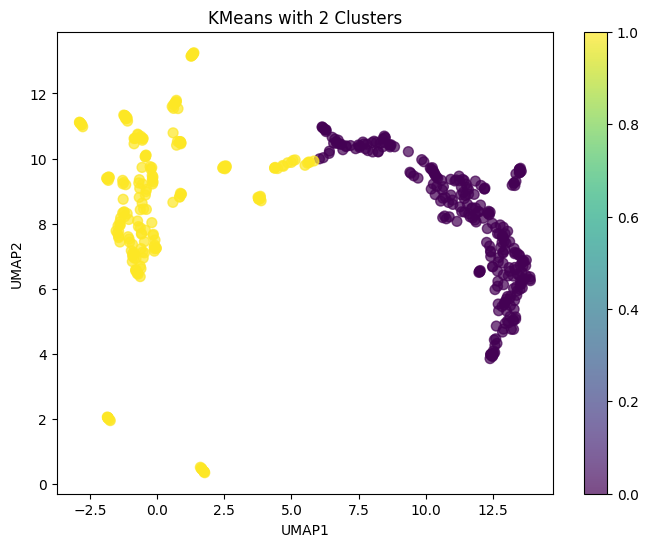

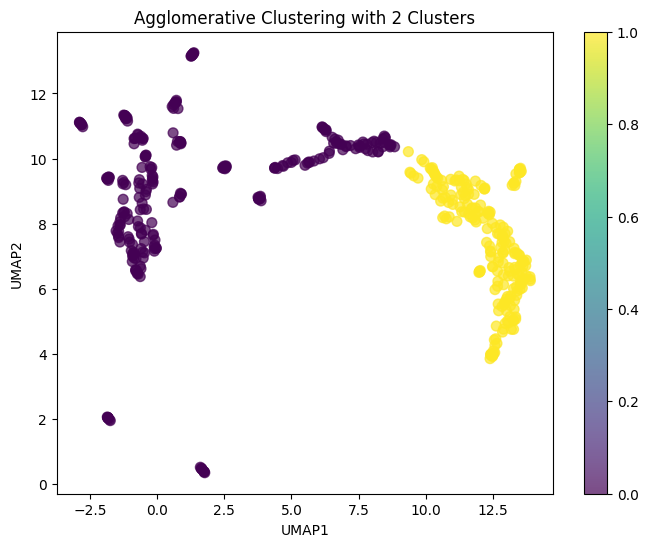

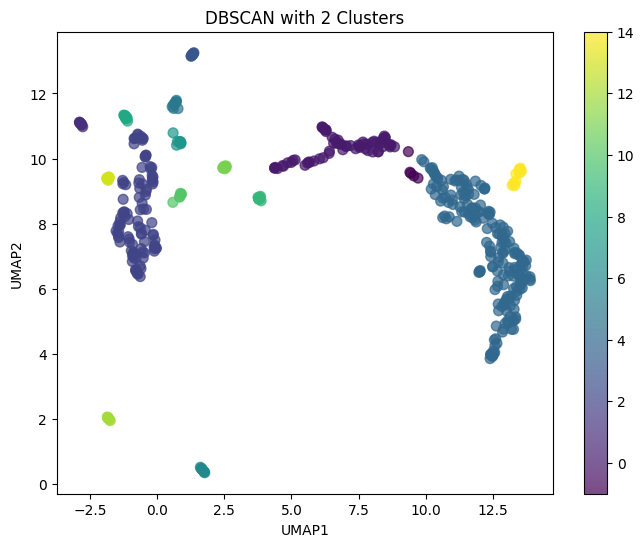

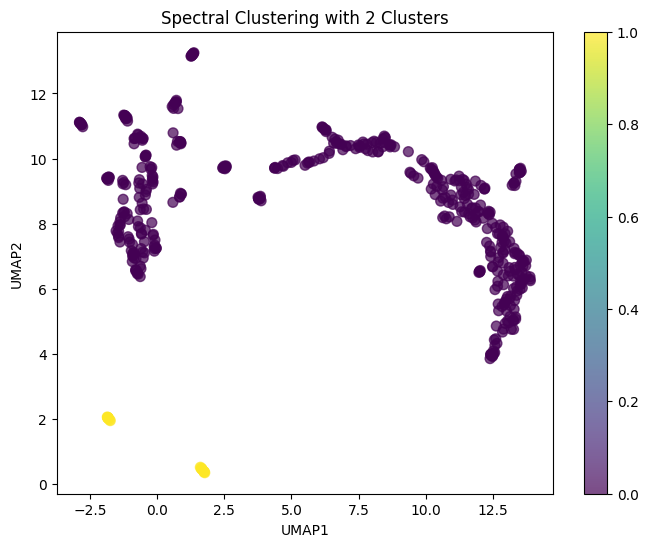

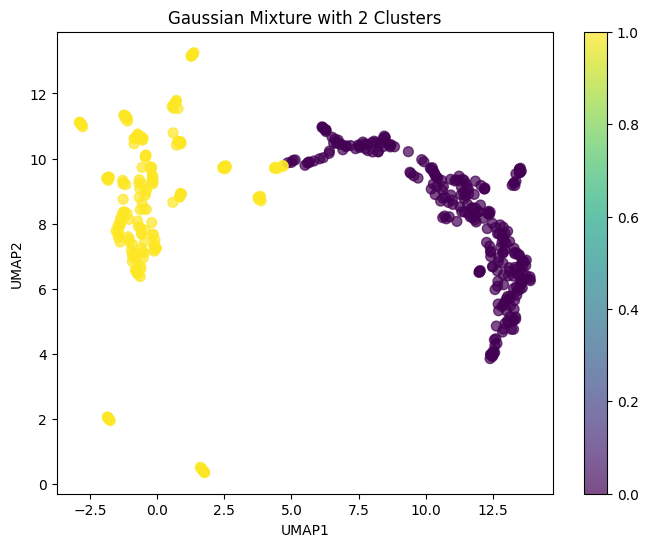

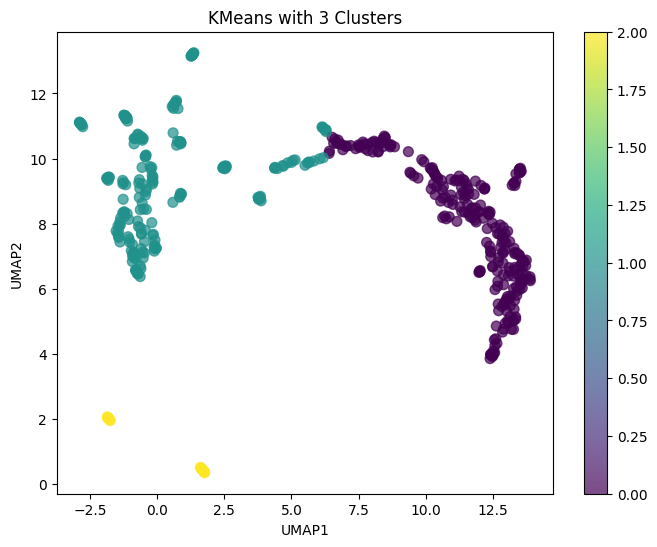

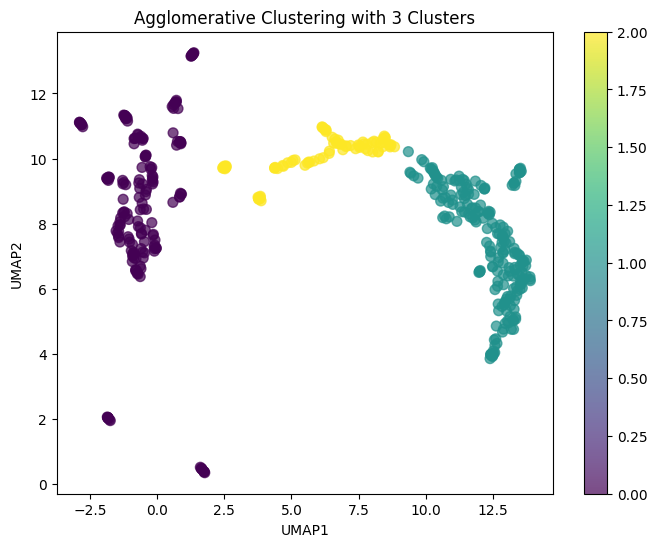

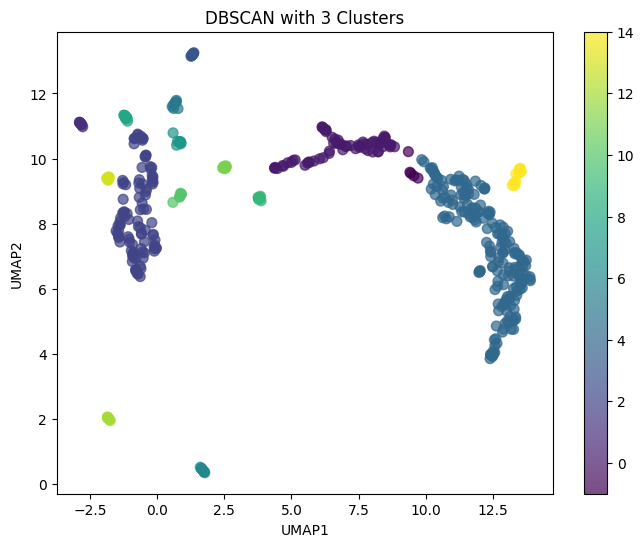

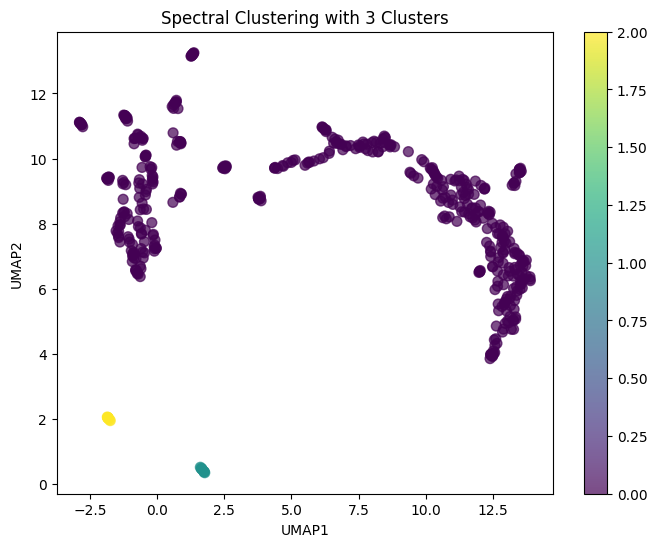

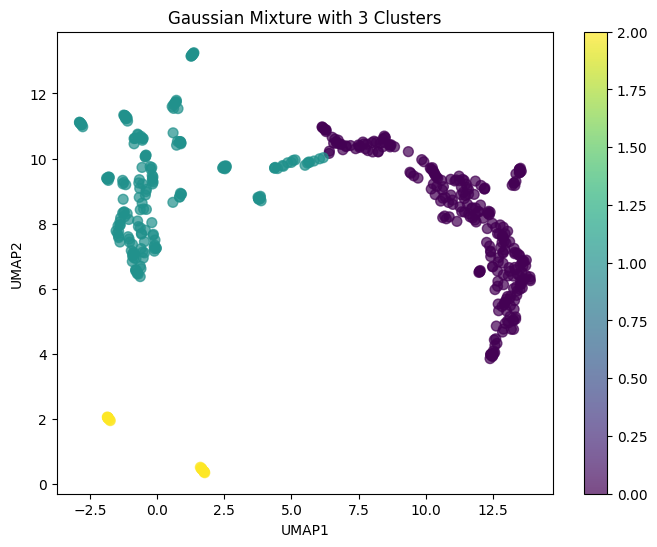

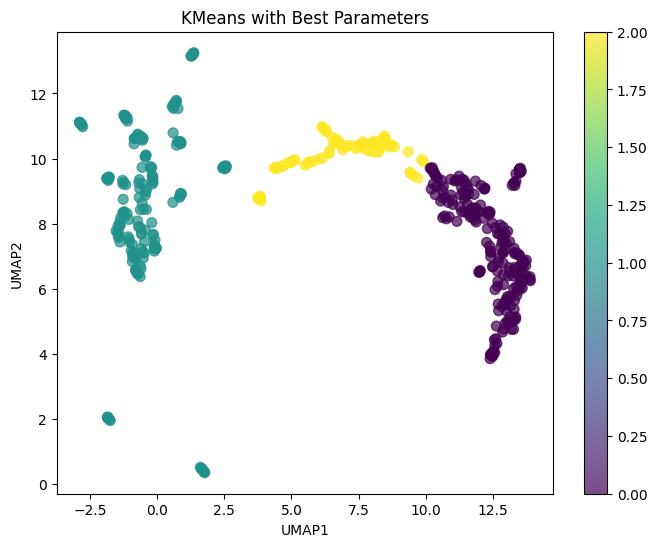

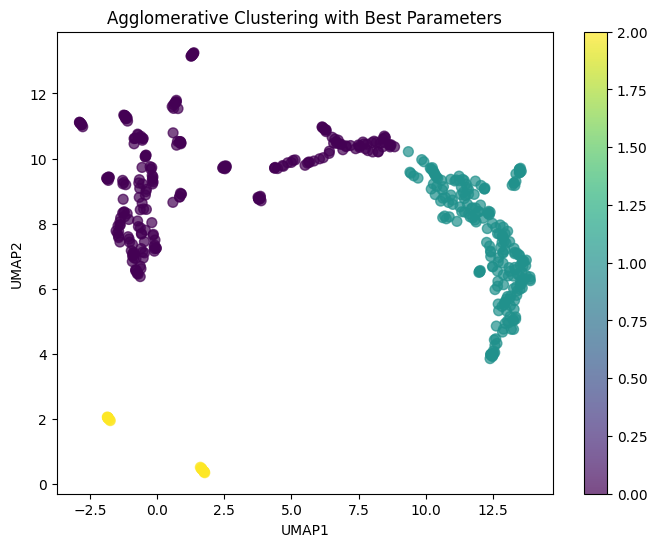

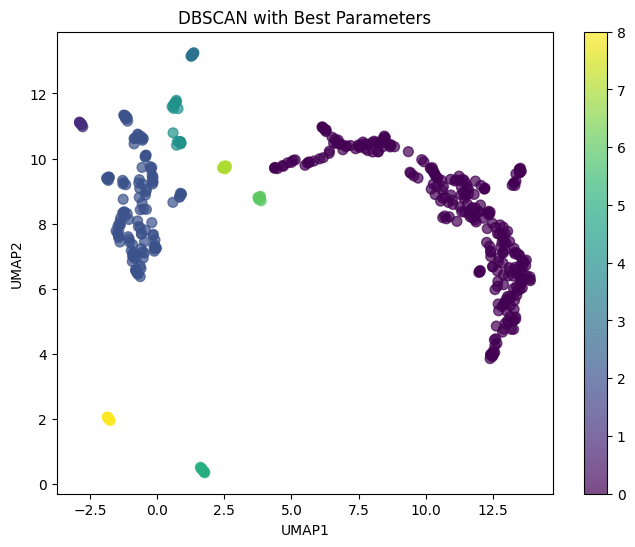

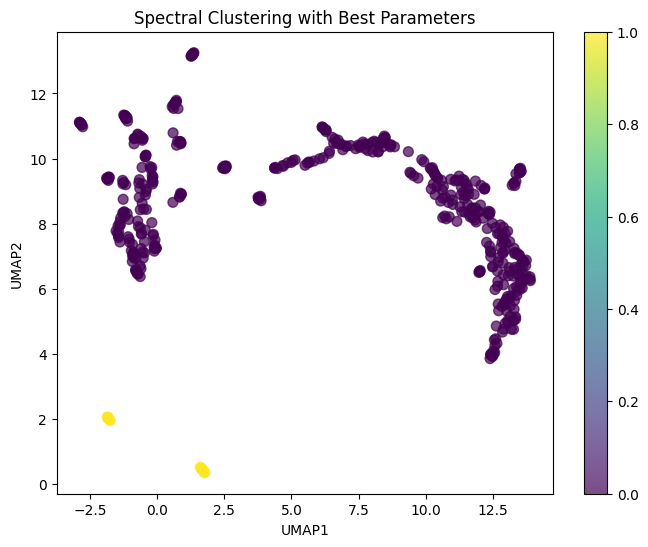

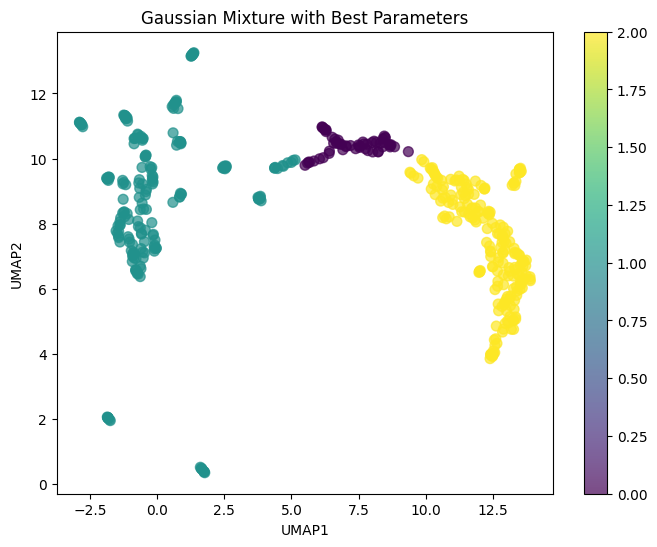

In [10]:
import matplotlib.pyplot as plt

# Function to plot clustering results
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.colorbar()
    plt.show()

# Define titles for the plots
titles_2 = {
    'KMeans_2': 'KMeans with 2 Clusters',
    'AgglomerativeClustering_2': 'Agglomerative Clustering with 2 Clusters',
    'DBSCAN_2': 'DBSCAN with 2 Clusters',
    'SpectralClustering_2': 'Spectral Clustering with 2 Clusters',
    'GaussianMixture_2': 'Gaussian Mixture with 2 Clusters'
}

titles_3 = {
    'KMeans_3': 'KMeans with 3 Clusters',
    'AgglomerativeClustering_3': 'Agglomerative Clustering with 3 Clusters',
    'DBSCAN_3': 'DBSCAN with 3 Clusters',
    'SpectralClustering_3': 'Spectral Clustering with 3 Clusters',
    'GaussianMixture_3': 'Gaussian Mixture with 3 Clusters'
}

titles_best = {
    'KMeans_Best': 'KMeans with Best Parameters',
    'HCA_Best': 'Agglomerative Clustering with Best Parameters',
    'DBSCAN_Best': 'DBSCAN with Best Parameters',
    'SpectralClustering_Best': 'Spectral Clustering with Best Parameters',
    'GaussianMixture_Best': 'Gaussian Mixture with Best Parameters'
}

# Plot clusters for 2 clusters
for model_name in models_2_clusters.keys():
    plot_clusters(umap_data, cluster_labels_2[model_name], titles_2[model_name])

# Plot clusters for 3 clusters
for model_name in models_3_clusters.keys():
    plot_clusters(umap_data, cluster_labels_3[model_name], titles_3[model_name])

# Plot clusters for best parameters
plot_clusters(umap_data, kmeans_best_labels, titles_best['KMeans_Best'])
plot_clusters(umap_data, hca_best_labels, titles_best['HCA_Best'])
plot_clusters(umap_data, dbscan_best_labels, titles_best['DBSCAN_Best'])
plot_clusters(umap_data, spectral_best_labels, titles_best['SpectralClustering_Best'])
plot_clusters(umap_data, gmm_best_labels, titles_best['GaussianMixture_Best'])


+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| Model                   |   Silhouette (2 Clusters) |   Davies-Bouldin (2 Clusters) |   Calinski-Harabasz (2 Clusters) |   Silhouette (3 Clusters) |   Davies-Bouldin (3 Clusters) |   Calinski-Harabasz (3 Clusters) |   Silhouette (Best Params) |   Davies-Bouldin (Best Params) |   Calinski-Harabasz (Best Params) |
+=========================+===========================+===============================+==================================+===========================+===============================+==================================+============================+================================+===================================+
| KMeans                  |                  0.65900

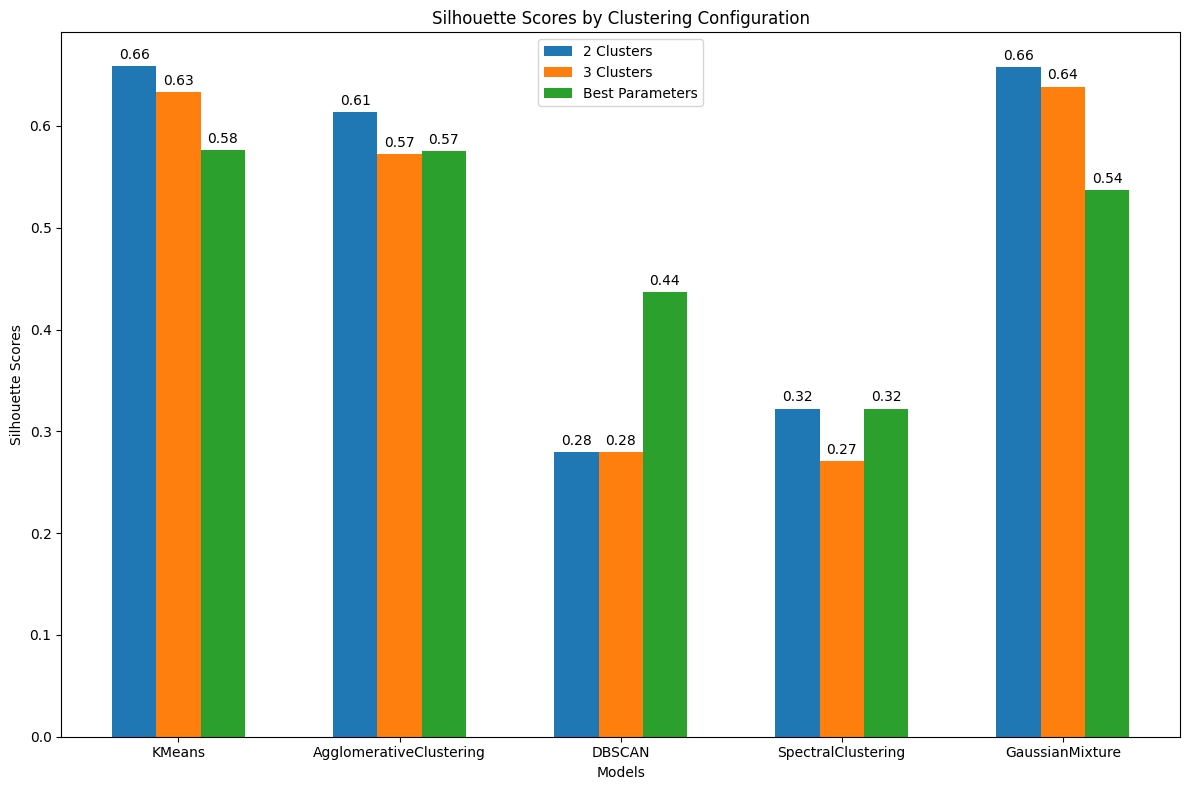

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Comparison results for 2, 3 clusters, and best parameters
comparison_results = {
    'KMeans': {
        '2 Clusters': evaluation_results_2['KMeans_2'],
        '3 Clusters': evaluation_results_3['KMeans_3'],
        'Best Parameters': best_evaluation_results['KMeans_Best']
    },
    'AgglomerativeClustering': {
        '2 Clusters': evaluation_results_2['AgglomerativeClustering_2'],
        '3 Clusters': evaluation_results_3['AgglomerativeClustering_3'],
        'Best Parameters': best_evaluation_results['HCA_Best']
    },
    'DBSCAN': {
        '2 Clusters': evaluation_results_2['DBSCAN_2'],
        '3 Clusters': evaluation_results_3['DBSCAN_3'],
        'Best Parameters': best_evaluation_results['DBSCAN_Best']
    },
    'SpectralClustering': {
        '2 Clusters': evaluation_results_2['SpectralClustering_2'],
        '3 Clusters': evaluation_results_3['SpectralClustering_3'],
        'Best Parameters': best_evaluation_results['SpectralClustering_Best']
    },
    'GaussianMixture': {
        '2 Clusters': evaluation_results_2['GaussianMixture_2'],
        '3 Clusters': evaluation_results_3['GaussianMixture_3'],
        'Best Parameters': best_evaluation_results['GaussianMixture_Best']
    }
}

# Format the comparison results for better presentation
formatted_comparison_results = []

for model_name, results in comparison_results.items():
    formatted_comparison_results.append([
        model_name,
        results['2 Clusters']['Silhouette Score'], results['2 Clusters']['Davies-Bouldin Index'], results['2 Clusters']['Calinski-Harabasz Index'],
        results['3 Clusters']['Silhouette Score'], results['3 Clusters']['Davies-Bouldin Index'], results['3 Clusters']['Calinski-Harabasz Index'],
        results['Best Parameters']['Silhouette Score'], results['Best Parameters']['Davies-Bouldin Index'], results['Best Parameters']['Calinski-Harabasz Index']
    ])

# Define table headers
headers = ["Model", 
           "Silhouette (2 Clusters)", "Davies-Bouldin (2 Clusters)", "Calinski-Harabasz (2 Clusters)",
           "Silhouette (3 Clusters)", "Davies-Bouldin (3 Clusters)", "Calinski-Harabasz (3 Clusters)",
           "Silhouette (Best Params)", "Davies-Bouldin (Best Params)", "Calinski-Harabasz (Best Params)"]

# Print comparison results as a table
print(tabulate(formatted_comparison_results, headers=headers, tablefmt="grid"))

# Prepare data for bar chart
models = list(comparison_results.keys())
silhouette_2 = [comparison_results[model]['2 Clusters']['Silhouette Score'] for model in models]
silhouette_3 = [comparison_results[model]['3 Clusters']['Silhouette Score'] for model in models]
silhouette_best = [comparison_results[model]['Best Parameters']['Silhouette Score'] for model in models]

x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, silhouette_2, width, label='2 Clusters')
rects2 = ax.bar(x, silhouette_3, width, label='3 Clusters')
rects3 = ax.bar(x + width, silhouette_best, width, label='Best Parameters')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Silhouette Scores')
ax.set_title('Silhouette Scores by Clustering Configuration')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels to bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()
